# Pset 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
from scipy.stats import multivariate_normal, poisson, norm

## Problem 2

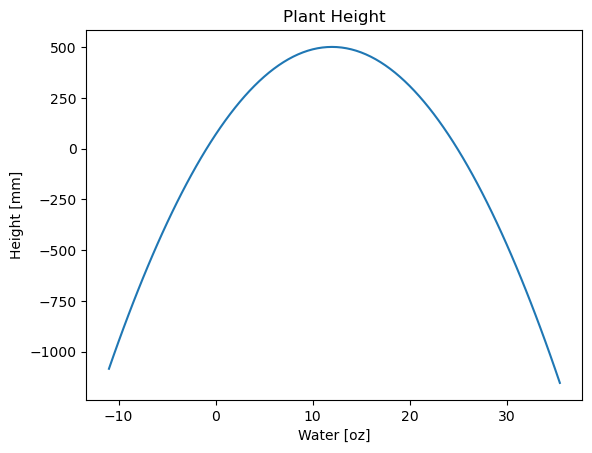

In [2]:
x = np.arange(-11, 36, 0.5)
f = -3 * x**2 + 72*x + 70

fig1, ax1 = plt.subplots()
ax1.plot(x, f)
ax1.set_title("Plant Height")
ax1.set_xlabel("Water [oz]")
ax1.set_ylabel("Height [mm]")
plt.show()
fig1.savefig("1d-plant-height.pdf")

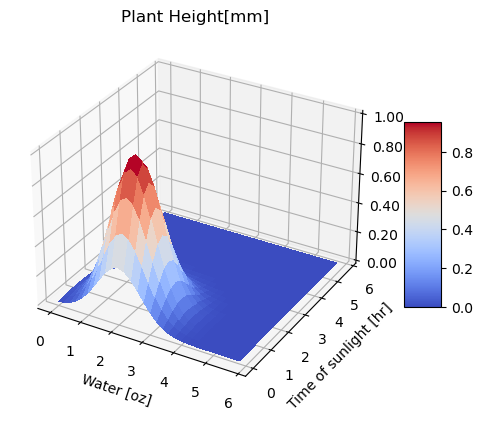

In [3]:
x1, x2 = np.arange(0, 6, 0.2), np.arange(0, 6, 0.25)
x1, x2 = np.meshgrid(x1, x2)
g = np.exp(-(x1 - 2)**2 - (x2 - 1)**2)

fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax2.plot_surface(x1, x2, g, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax2.zaxis.set_major_formatter("{x:.02f}")
ax2.set_xlabel("Water [oz]")
ax2.set_ylabel("Time of sunlight [hr]")
ax2.set_title("Plant Height[mm]")

# Add a color bar which maps values to colors.
fig2.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
fig2.savefig("2d-plant-height.pdf")

## Problem 3

### 3.1

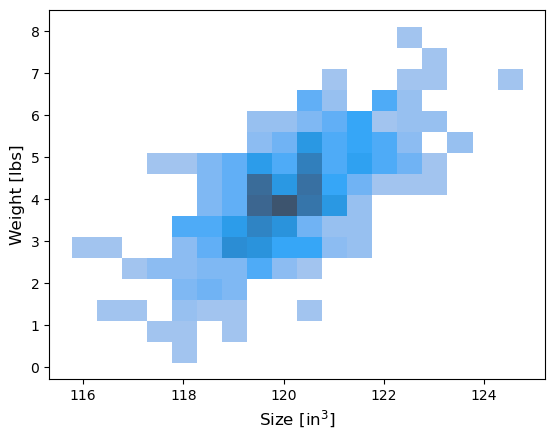

In [4]:
mu = np.array([120, 4])
sigma = np.array([[1.5, 1], [1, 1.5]])
SW = multivariate_normal(mu, sigma)
sample = SW.rvs(500)
df = pd.DataFrame(sample, columns=["size", "weight"])

ax = sns.histplot(df, x="size", y="weight", binwidth=(0.5, 0.5))
ax.set_xlabel(r"Size [$\rm{in}^3$]", fontsize=12)
ax.set_ylabel("Weight [lbs]", fontsize=12)
plt.savefig("bivariate_normal.pdf")

### 3.2

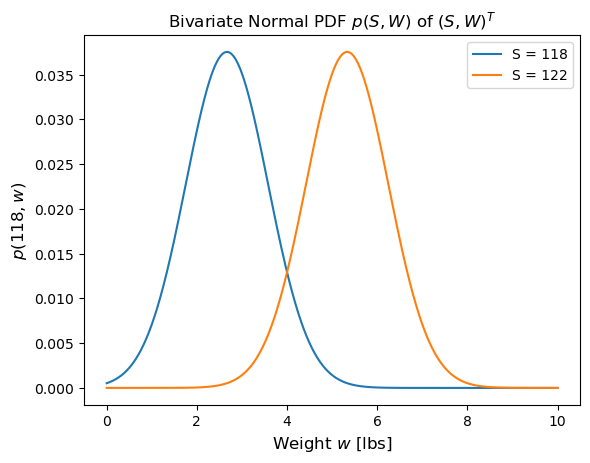

In [5]:
bvn_fig, bvn_ax = plt.subplots()
w = np.linspace(0, 10, 1001)
pdf1 = np.array([SW.pdf([118, x]) for x in w])
pdf2 = np.array([SW.pdf([122, x]) for x in w])

bvn_ax.plot(w, pdf1, label="S = 118")
bvn_ax.plot(w, pdf2, label="S = 122")
bvn_ax.set_xlabel("Weight $w$ [lbs]", fontsize=12)
bvn_ax.set_ylabel(r"$p(118, w)$", fontsize=12)
bvn_ax.set_title(r"Bivariate Normal PDF $p(S, W)$ of $(S, W)^T$")
bvn_ax.legend()
bvn_fig.show()
bvn_fig.savefig("bvn_pdf.pdf")

### 3.4

In [6]:
0.6**2 * 1.5 + 0.2**2 * 1.5 + 0.24 + 5

5.84

### 3.5

In [58]:
N = poisson(3)
Eps = norm(loc=0, scale=np.sqrt(5))

def Tstar():
    tstar = 0
    # Iterate over each hour in a day
    for i in range(24):
        # Number of packages arriving in current hour
        n = N.rvs(1)[0]
        # If one package arrives, index over the whole data array
        if n == 1:
            # Size and weight of package, particular noise value
            sw_data = SW.rvs(n)
            eps = Eps.rvs(1)[0]
            # Add package processing time to total
            tstar += 60 + 0.6 * sw_data[1] + 0.2 * sw_data[0] + eps
        # If > 1 package arrives, iterate over each package
        elif n > 1:
            sw_data = SW.rvs(n)
            for sw in sw_data:
                # Noise for current package
                eps = Eps.rvs(1)[0]
                # Add package processing time to total
                tstar += 60 + 0.6 * sw[1] + 0.2 * sw[0] + eps
    # Return total processing time
    return tstar

samples = [Tstar() for _ in range(1000)]
print(f"Estimated mean: {np.mean(samples)}")
print(f"Estimated standard deviation: {np.std(samples)}")

Estimated mean: 6271.594735918915
Estimated standard deviation: 770.280242729011
